In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as s
import plotly.express as px

In [2]:
cf=pd.read_csv("cleaned_air.csv")
cf.head(3)

Operating Airline Operating Airline IATA Code Published Airline  \
0  SkyWest Airlines                          OO   United Airlines   
1        Air Canada                          AC        Air Canada   
2    Japan Airlines                          JL    Japan Airlines   

  Published Airline IATA Code    GEO Summary GEO Region Landing Aircraft Type  \
0                          UA  International     Canada             Passenger   
1                          AC  International     Canada             Passenger   
2                          JL  International       Asia             Passenger   

  Aircraft Body Type Aircraft Manufacturer Aircraft Model  Landing Count  \
0       Regional Jet            Bombardier           CRJ2             30   
1        Narrow Body                Airbus           A320            125   
2          Wide Body                Boeing           B773             30   

   Total Landed Weight  
0              1410000  
1             17787978  
2             16620000

In [3]:
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22045 entries, 0 to 22044
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Operating Airline            22045 non-null  object
 1   Operating Airline IATA Code  22045 non-null  object
 2   Published Airline            22045 non-null  object
 3   Published Airline IATA Code  22045 non-null  object
 4   GEO Summary                  22045 non-null  object
 5   GEO Region                   22045 non-null  object
 6   Landing Aircraft Type        22045 non-null  object
 7   Aircraft Body Type           22045 non-null  object
 8   Aircraft Manufacturer        22045 non-null  object
 9   Aircraft Model               22045 non-null  object
 10  Landing Count                22045 non-null  int64 
 11  Total Landed Weight          22045 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 2.0+ MB


In [4]:
cf.isnull().sum()

Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Landing Aircraft Type          0
Aircraft Body Type             0
Aircraft Manufacturer          0
Aircraft Model                 0
Landing Count                  0
Total Landed Weight            0
dtype: int64

In [30]:
count = cf['Operating Airline'].value_counts()
print(count)

Operating Airline
United Airlines                     2646
United Airlines - Pre 07/01/2013    1834
Alaska Airlines                     1340
Delta Air Lines                     1305
SkyWest Airlines                    1219
                                    ... 
Trego Dugan Aviation                   2
Focus Air                              2
E.A.G.L.E.                             1
Xtra Airways                           1
Boeing Company                         1
Name: count, Length: 107, dtype: int64


GEO Summary
International    11221
Domestic         10824
Name: count, dtype: int64


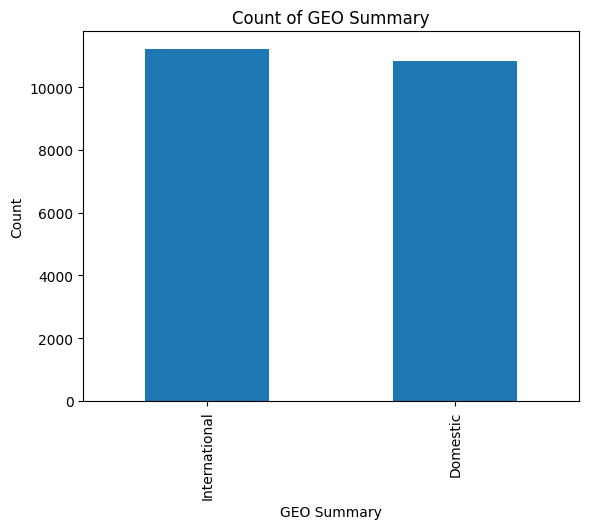

In [31]:
count = cf['GEO Summary'].value_counts()
print(count)
count.plot(kind='bar')
# Add title and labels
plt.title('Count of GEO Summary')
plt.xlabel('GEO Summary')
plt.ylabel('Count')
# Display the plot
plt.show()

     GEO Summary  Count
0  International  11221
1       Domestic  10824


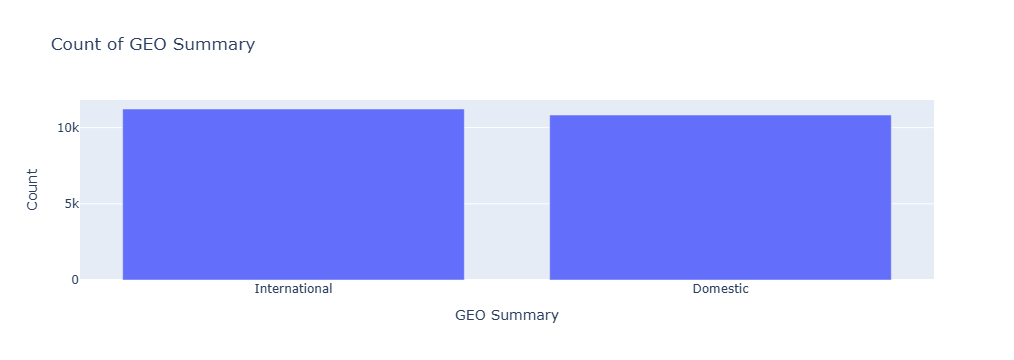

In [26]:
count = cf['GEO Summary'].value_counts().reset_index()
count.columns = ['GEO Summary', 'Count']

# Print the counts
print(count)

# Create a bar plot with Plotly
fig = px.bar(count, x='GEO Summary', y='Count', title='Count of GEO Summary')
fig.update_traces(textposition='outside')
# Show the plot
fig.show()

           GEO Summary  Count
0                   US  10840
1                 Asia   4082
2               Europe   2334
3               Canada   2028
4               Mexico   1572
5  Australia / Oceania    647
6      Central America    326
7          Middle East    163
8        South America     50
9            Caribbean      3


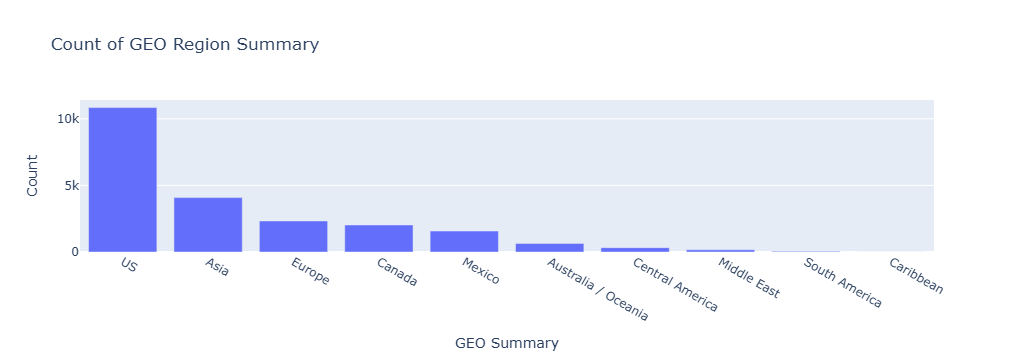

In [39]:
count = cf['GEO Region'].value_counts().reset_index()
count.columns = ['GEO Summary', 'Count']

# Print the counts
print(count)

# Create a bar plot with Plotly
fig = px.bar(count, x='GEO Summary', y='Count', title='Count of GEO Region Summary')
fig.update_traces(textposition='outside')
# Show the plot
fig.show()

          GEO Summary  Count
0              Boeing  13261
1              Airbus   5666
2          Bombardier   1165
3   McDonnell Douglas    853
4             Embraer    686
5          Beechcraft    164
6              Shorts     70
7           Fairchild     59
8         DeHavilland     41
9              Cessna     29
10            LearJet     18
11         Swearingen     13
12              Piper      9
13           BAE-Avro      6
14           Lockheed      5


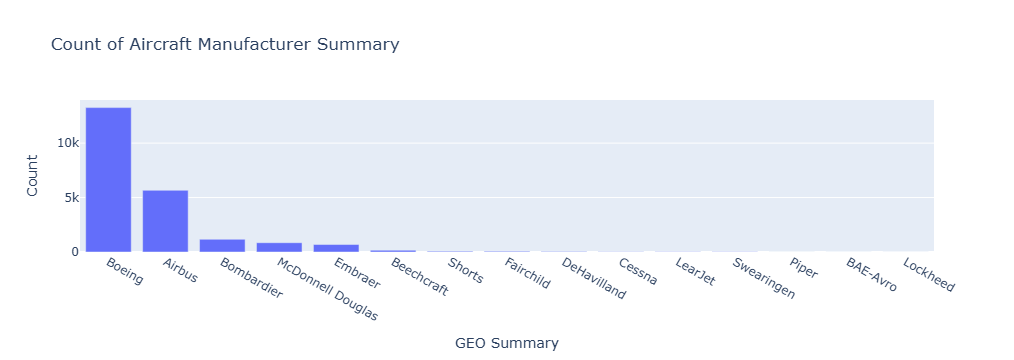

In [40]:
count = cf['Aircraft Manufacturer'].value_counts().reset_index()
count.columns = ['GEO Summary', 'Count']

# Print the counts
print(count)

# Create a bar plot with Plotly
fig = px.bar(count, x='GEO Summary', y='Count', title='Count of Aircraft Manufacturer Summary')
fig.update_traces(textposition='outside')
# Show the plot
fig.show()

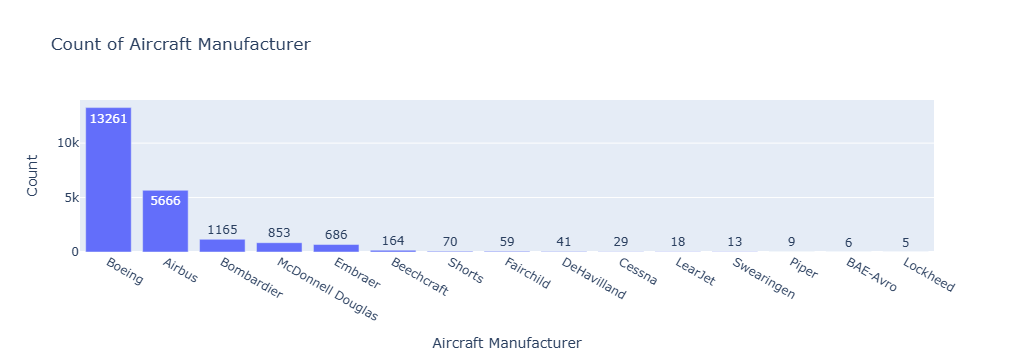

In [28]:
import plotly.graph_objects as go

# Sample data
count = cf['Aircraft Manufacturer'].value_counts().reset_index()
count.columns = ['Aircraft Manufacturer', 'Count']
# Create the bar graph
fig = go.Figure(data=[
    go.Bar(
        x=count['Aircraft Manufacturer'],
        y=count['Count'],
        text=count['Count'],
        textposition='auto'
    )
])
# Add title and labels
fig.update_layout(
    title='Count of Aircraft Manufacturer',
    xaxis_title='Aircraft Manufacturer',
    yaxis_title='Count'
)
# Display the plot
fig.show()

  Landing Aircraft Type  Count
0             Passenger  19220
1             Freighter   2683
2                 Combi    142


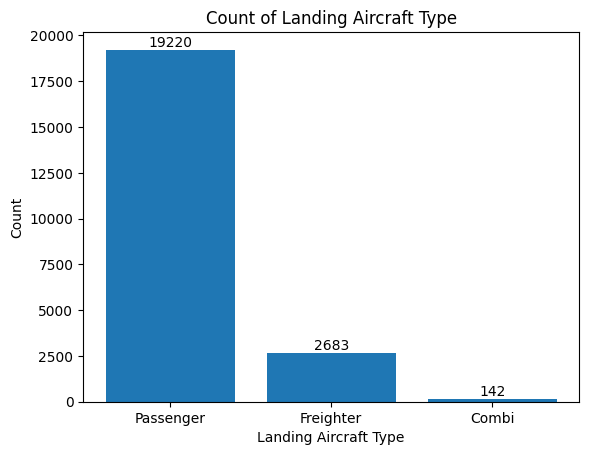

In [40]:
# Count the rows of each unique value in "Landing Aircraft Type"
count = cf['Landing Aircraft Type'].value_counts().reset_index()
count.columns = ['Landing Aircraft Type', 'Count']

# Print the counts
print(count)

# Plot the counts on a bar graph
fig, ax = plt.subplots()
bars = ax.bar(count['Landing Aircraft Type'], count['Count'])

# Add title and labels
ax.set_title('Count of Landing Aircraft Type')
ax.set_xlabel('Landing Aircraft Type')
ax.set_ylabel('Count')

# Annotate each bar with the count value
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Display the plot
plt.show()


In [13]:
count = cf['Aircraft Manufacturer'].value_counts()
count

Aircraft Manufacturer
Boeing               13261
Airbus                5666
Bombardier            1165
McDonnell Douglas      853
Embraer                686
Beechcraft             164
Shorts                  70
Fairchild               59
DeHavilland             41
Cessna                  29
LearJet                 18
Swearingen              13
Piper                    9
BAE-Avro                 6
Lockheed                 5
Name: count, dtype: int64

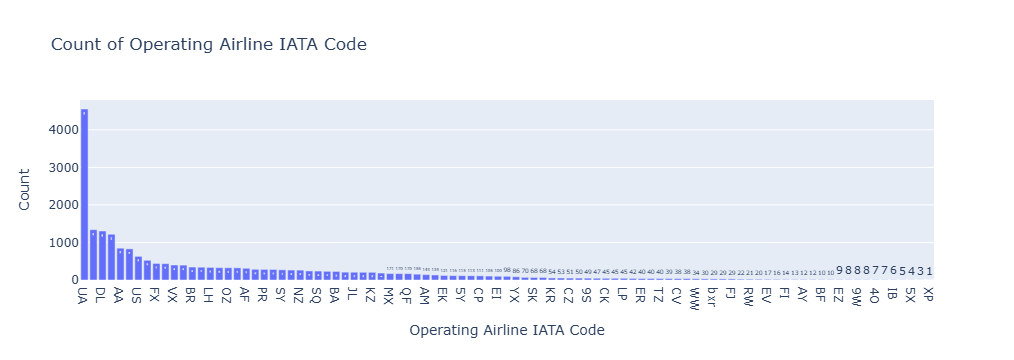

In [22]:
import plotly.graph_objects as go

# Sample data
count = cf['Operating Airline IATA Code'].value_counts().reset_index()
count.columns = ['Operating Airline IATA Code', 'Count']

# Create the bar graph
fig = go.Figure(data=[
    go.Bar(
        x=count['Operating Airline IATA Code'],
        y=count['Count'],
        text=count['Count'],
        textposition='auto'
    )
])

# Add title and labels
fig.update_layout(
    title='Count of Operating Airline IATA Code',
    xaxis_title='Operating Airline IATA Code',
    yaxis_title='Count'
)

# Display the plot
fig.show()

In [35]:
zz=cf["Landing Count"].value_counts()
zz


Landing Count
31      1533
1       1515
30      1205
2        629
4        464
        ... 
1174       1
973        1
1045       1
840        1
1655       1
Name: count, Length: 1278, dtype: int64

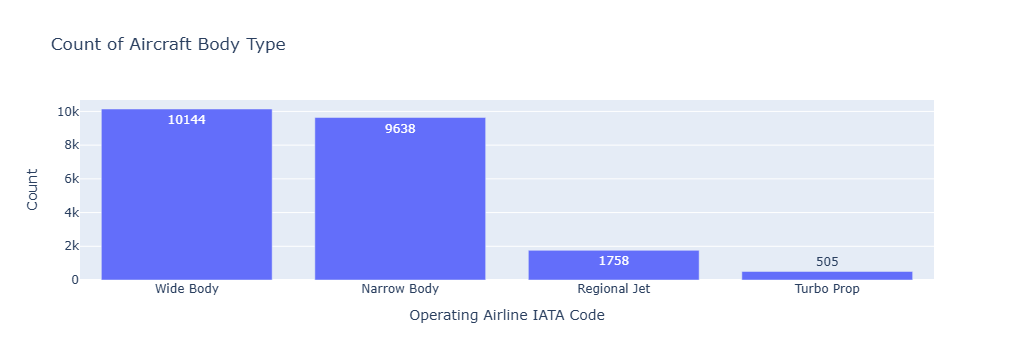

In [42]:
# Sample data
count = cf['Aircraft Body Type'].value_counts().reset_index()
count.columns = ['Aircraft Body Type', 'Count']

# Create the bar graph
fig = go.Figure(data=[
    go.Bar(
        x=count['Aircraft Body Type'],
        y=count['Count'],
        text=count['Count'],
        textposition='auto'
    )
])

# Add title and labels
fig.update_layout(
    title='Count of Aircraft Body Type',
    xaxis_title='Operating Airline IATA Code',
    yaxis_title='Count'
)

# Display the plot
fig.show()